In [367]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sympy import symbols, Eq, solve
from datetime import datetime
from datetime import datetime
from dateutil.relativedelta import relativedelta


# Importing Dataframe

In [368]:
excel_file_path = 'chapt26.xlsx'
interest = pd.read_excel(excel_file_path, sheet_name='Data', usecols='A,H')
interest = interest.iloc[7:]
interest.columns = ['Year', 'Interest']
interest = interest.reset_index(drop=True)

In [369]:
excel_file_path = 'monthly_data.xls'
df = pd.read_excel(excel_file_path, sheet_name='Data', usecols='A,J')
df = df.iloc[7:]
df = df.reset_index(drop=True)
df.columns = ['Date', 'Price']
df['Date'] = pd.to_datetime(df['Date'], format='%Y.%m')
df['Year'] = df['Date'].dt.year

In [370]:
df = pd.merge(interest, df, on = "Year")
df["Interest"] = (df["Interest"] - 1)/12
df = df[["Date", "Price", "Interest"]]

# DataFrame Functions

In [371]:
def filter_dataframe_by_date (df, start_date=datetime(1500, 1, 1), end_date=datetime(9999, 1, 1)):
    
    filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    filtered_df.head()

    return filtered_df.reset_index(drop=True)

def add_percent_change (df):
    df = df.copy()
    diff = df['Price'].pct_change(fill_method=None)
    df["Percent Change"] = diff
    return df


def calculate_growth (df, start_amount):
    df.loc[0, "Total Normal Amount"] = start_amount
    df.loc[0, "Total Leveraged Amount"] = start_amount
    for i in range(1, len(df)):
        percent_change = df.loc[i, "Percent Change"]
        interest_change  = df.loc[i, "Interest"]
        df.loc[i, 'Total Normal Amount'] = df.loc[i - 1, 'Total Normal Amount'] * (1 + percent_change)
        df.loc[i, 'Total Leveraged Amount'] = df.loc[i - 1, 'Total Leveraged Amount'] * (1 + ((3 * percent_change) - (2 * interest_change)))
    return df

In [372]:
df = add_percent_change(df)
df.head()

,Date,Price,Interest,Percent Change
0,1871-01-01,109.050018,0.003959,NaN
1,1871-02-01,107.765291,0.003959,-0.011781
2,1871-03-01,109.298845,0.003959,0.01423
3,1871-04-01,117.171191,0.003959,0.072026
4,1871-05-01,123.479273,0.003959,0.053836


# Math Functions

In [415]:

def market_drop(leveraged_x, new_leveraged_x):
    amount = 10000.
    leveraged_amount = amount * leveraged_x

    x = symbols('x')
    equation = Eq((leveraged_amount - x) / (amount - x), new_leveraged_x)
    total_amount_drop = solve(equation, x)[0]
    return total_amount_drop / amount


def calculate_30_year_end_amount(df):
    start_date = datetime(1871, 1, 1)
    end_date = datetime(1901, 1, 1)

    normal_end_amounts = []
    leveraged_end_amounts = []
    for i in range(1,10):
        new_df = filter_dataframe_by_date(df, start_date, end_date)
        new_df = calculate_growth(new_df, 10000)

        normal_end_amount = new_df["Total Normal Amount"].iloc[-1]
        leveraged_end_amount = new_df["Total Leveraged Amount"].iloc[-1]

        print(normal_end_amount, leveraged_end_amount)

        normal_end_amounts.append(normal_end_amount)
        leveraged_end_amounts.append(leveraged_end_amount)
        start_date += relativedelta(months=1)
        end_date += relativedelta(months=1)

    return normal_end_amounts, leveraged_end_amounts
    

# Graph Functions

In [381]:
def plot_df (df):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['Price'],)
    plt.plot(df['Date'], df['New_Price'],)

    plt.title('Value Over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')
    

In [402]:
price_diff = filter_dataframe_by_date(df, datetime(1871, 1, 1), datetime(1901, 1, 1))
price_diff = calculate_growth(price_diff, 10000.)

In [403]:
price_diff.head()

,Date,Price,Interest,Percent Change,Total Normal Amount,Total Leveraged Amount
0,1871-01-01,109.050018,0.003959,NaN,10000.000000,10000.000000
1,1871-02-01,107.765291,0.003959,-0.011781,9882.189174,9567.393843
2,1871-03-01,109.298845,0.003959,0.01423,10022.817624,9900.091533
3,1871-04-01,117.171191,0.003959,0.072026,10744.719956,11960.897493
4,1871-05-01,123.479273,0.003959,0.053836,11323.177619,13797.995728


In [416]:
normal_list, leverage_list = calculate_30_year_end_amount(df)

119890.13325421579 78647.18121801139
134733.13606057427 114421.39306739492
138072.44604441134 123306.36442947718
141811.2839760805 132698.77379416165
128213.4836012051 98395.77140941926
139747.8192319116 125012.9092419217
131026.00520859132 101362.55885610214
127358.2277064523 93769.38403355022
126708.01739768688 92774.85781633561


In [397]:
normal_list

[0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.012622945139197705,
 0.01262294

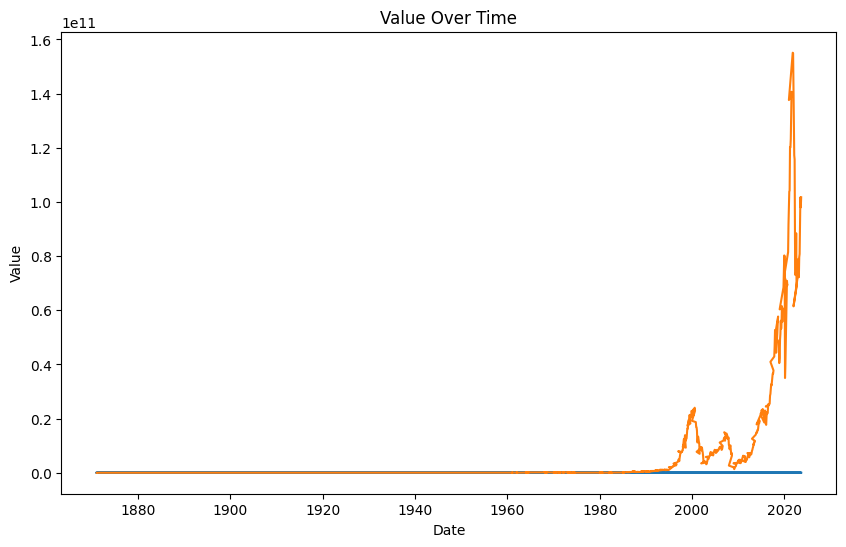

In [149]:
plot_df(filter_df)